In [4]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
import sklearn
plt.style.use('ggplot')
plt.rcParams['font.size'] = '20'
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

Data Setup

In [6]:
data = genfromtxt('element_data.csv', delimiter=',')
data

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan, 2.90000e+01, 1.32300e+03, 3.57300e+03, 8.90000e+01,
        1.10000e+00, 1.95000e+00],
       [        nan, 8.80000e+01, 1.23493e+03, 2.43500e+03, 4.70000e+01,
        1.93000e+00, 1.60000e+00],
       [        nan, 8.30000e+01, 9.33470e+02, 2.79200e+03, 1.30000e+01,
        1.61000e+00, 1.25000e+00],
       [        nan, 4.00000e+01, 1.09000e+03, 8.87000e+02, 3.30000e+01,
        2.18000e+00, 1.15000e+00],
       [        nan, 1.37000e+02, 1.33733e+03, 3.12900e+03, 7.90000e+01,
        2.54000e+00, 1.35000e+00],
       [        nan, 2.11000e+02, 2.34900e+03, 4.20000e+03, 5.00000e+00,
        2.04000e+00, 8.50000e-01],
       [        nan, 9.00000e+00, 1.00000e+03, 2.14300e+03, 5.60000e+01,
        8.90000e-01, 2.15000e+00],
       [        nan, 1.22000e+02, 1.56000e+03, 2.74200e+03, 4.00000e+00,
        1.57000e+00, 1.05000e+00],
       [        nan, 2.90000

In [2]:
data = pd.read_csv('cleaned_data.csv', index_col = 0)
data = data[data['Tc'] > 10]
data

Tc  Cuprate  Fe-based              composition  0-norm  \
name                                                                            
Al0.23Nb0.75Zr0.013  18.3        0         0    Al0.23 Nb0.75 Zr0.013       3   
Al0.245Nb0.725       18.4        0         0          Al0.245 Nb0.725       2   
Al0.25V0.75          16.9        0         0             Al0.25 V0.75       2   
Al0.2Si0.8V3         15.7        0         0           Al0.2 Si0.8 V3       3   
Al0.3Ga0.7V3         13.9        0         0           Al0.3 Ga0.7 V3       3   
...                   ...      ...       ...                      ...     ...   
Zn0.035Zr1N1Br1      14.0        0         0       Zn0.035 Zr1 N1 Br1       4   
Zn1Tl0.78Ba1Cu1O4.5  81.0        1         0  Zn1 Tl0.78 Ba1 Cu1 O4.5       5   
Zr0.5Hf0.5V2         10.1        0         0           Zr0.5 Hf0.5 V2       3   
Zr1Ru0.99Rh0.01P1    10.1        0         0     Zr1 Ru0.99 Rh0.01 P1       4   
Zr2Rh1H0.08          11.1        0         0            Zr2 Rh1 H0.08       3   

                       2-norm    3-norm    5-norm    7-norm   10-norm  ...  \
name                                                                   ...   
Al0.23Nb0.75Zr0.013  0.790113  0.762480  0.755696  0.755315  0.755288  ...   
Al0.245Nb0.725       0.788946  0.756916  0.748080  0.747476  0.747424  ...   
Al0.25V0.75          0.790569  0.759147  0.750616  0.750049  0.750001  ...   
Al0.2Si0.8V3         0.777817  0.754784  0.750202  0.750010  0.750000  ...   
Al0.3Ga0.7V3         0.773789  0.753410  0.750105  0.750004  0.750000  ...   
...                       ...       ...       ...       ...       ...  ...   
Zn0.035Zr1N1Br1      0.570809  0.475208  0.410455  0.385480  0.367751  ...   
Zn1Tl0.78Ba1Cu1O4.5  0.589916  0.550300  0.543672  0.543485  0.543478  ...   
Zr0.5Hf0.5V2         0.707107  0.673540  0.666927  0.666678  0.666667  ...   
Zr1Ru0.99Rh0.01P1    0.575442  0.479158  0.413878  0.388703  0.370838  ...   
Zr2Rh1H0.08          0.726461  0.675365  0.653359  0.650073  0.649414  ...   

                     MagpieData mean SpaceGroupNumber  \
name                                                    
Al0.23Nb0.75Zr0.013                        227.615307   
Al0.245Nb0.725                             227.989691   
Al0.25V0.75                                228.000000   
Al0.2Si0.8V3                               228.400000   
Al0.3Ga0.7V3                               199.825000   
...                                               ...   
Zn0.035Zr1N1Br1                            151.166392   
Zn1Tl0.78Ba1Cu1O4.5                        103.057971   
Zr0.5Hf0.5V2                               217.333333   
Zr1Ru0.99Rh0.01P1                          130.103333   
Zr2Rh1H0.08                                204.064935   

                     MagpieData avg_dev SpaceGroupNumber  \
name                                                       
Al0.23Nb0.75Zr0.013                             2.091681   
Al0.245Nb0.725                                  1.510256   
Al0.25V0.75                                     1.500000   
Al0.2Si0.8V3                                    0.900000   
Al0.3Ga0.7V3                                   47.538750   
...                                                  ...   
Zn0.035Zr1N1Br1                                57.440786   
Zn1Tl0.78Ba1Cu1O4.5                            98.976055   
Zr0.5Hf0.5V2                                   15.555556   
Zr1Ru0.99Rh0.01P1                              85.402222   
Zr2Rh1H0.08                                    13.594198   

                     MagpieData mode SpaceGroupNumber  \
name                                                    
Al0.23Nb0.75Zr0.013                               229   
Al0.245Nb0.725                                    229   
Al0.25V0.75                                       229   
Al0.2Si0.8V3                                      229   
Al0.3Ga0.7V3                                      229   
...                             

In [3]:
col = [c for c in data.columns if not 'compound possible' in c]
col = [c for c in data.columns if not 'composition' in c]
data = data[col]
data_types = data.dtypes

In [4]:
features = [c for c in data.columns if c != "Tc"]
x = data[features]
y = data["Tc"]
feature_list = list(features)

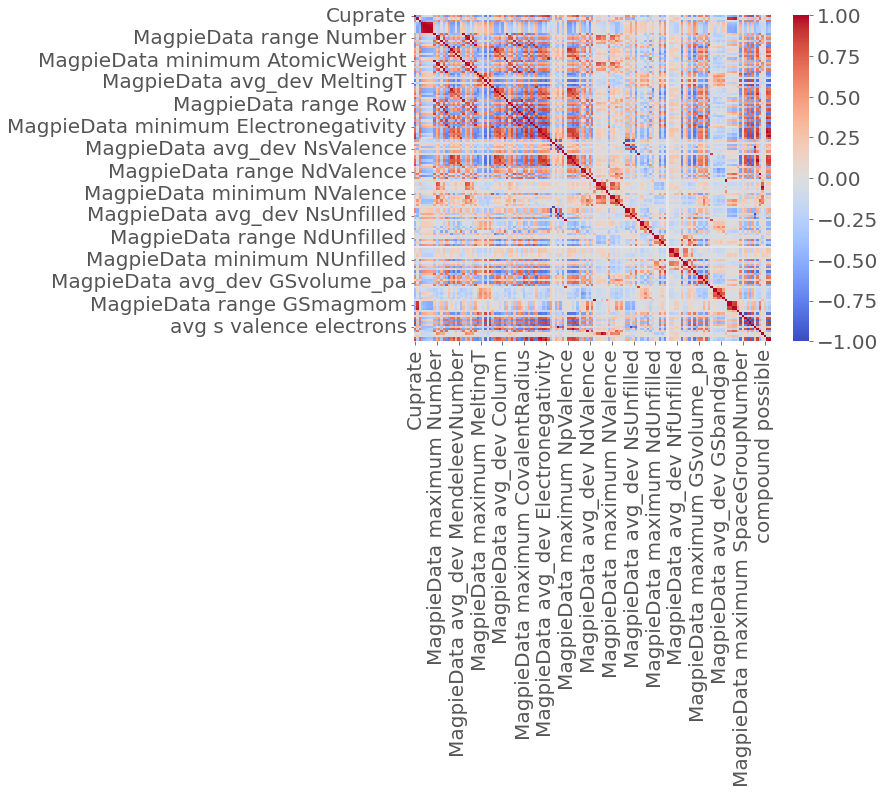

In [5]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(x.corr(), cmap="coolwarm", vmin=-1, vmax=1, ax=ax);

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state = 42)

Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x, train_y);

In [8]:
y_pred = rf.predict(test_x)
errors = abs(y_pred - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 8.09 degrees.


In [9]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

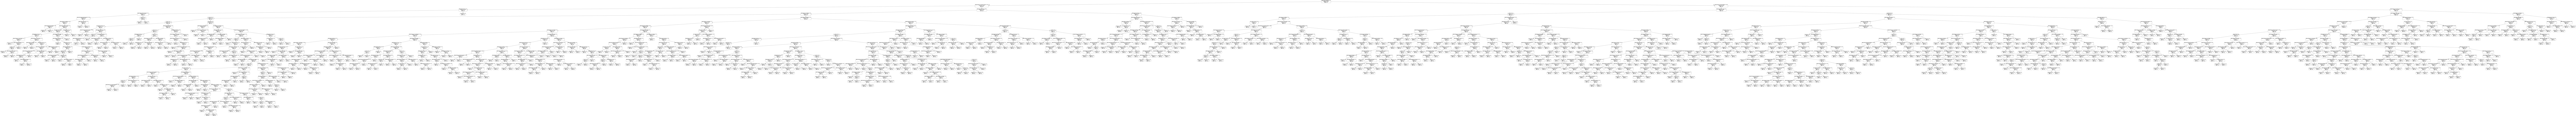

In [10]:
from IPython.display import Image
Image("tree.png")

In [11]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MagpieData mean NUnfilled Importance: 0.52
Variable: MagpieData avg_dev SpaceGroupNumber Importance: 0.07
Variable: 2-norm               Importance: 0.03
Variable: MagpieData mean MeltingT Importance: 0.02
Variable: MagpieData avg_dev NUnfilled Importance: 0.02
Variable: MagpieData avg_dev GSvolume_pa Importance: 0.02
Variable: 3-norm               Importance: 0.01
Variable: MagpieData range MendeleevNumber Importance: 0.01
Variable: MagpieData avg_dev MendeleevNumber Importance: 0.01
Variable: MagpieData avg_dev MeltingT Importance: 0.01
Variable: MagpieData mean Column Importance: 0.01
Variable: MagpieData avg_dev Column Importance: 0.01
Variable: MagpieData mean Row  Importance: 0.01
Variable: MagpieData avg_dev Row Importance: 0.01
Variable: MagpieData mean CovalentRadius Importance: 0.01
Variable: MagpieData avg_dev CovalentRadius Importance: 0.01
Variable: MagpieData mean Electronegativity Importance: 0.01
Variable: MagpieData avg_dev Electronegativity Importance: 0.01


training R2 = 0.929
training RMSE = 7.872


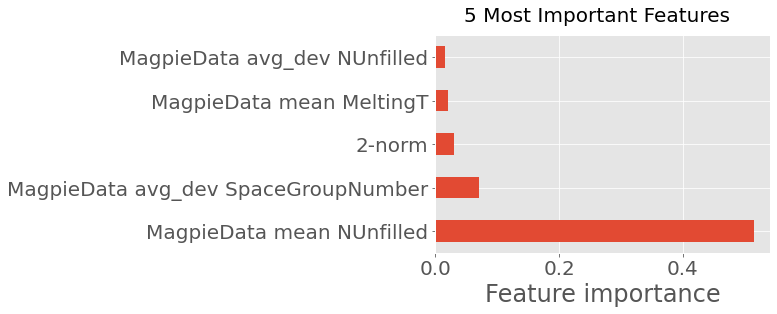

In [12]:
(pd.Series(rf.feature_importances_, index=x.columns).nlargest(5).plot(kind='barh'))
plt.xlabel("Feature importance");
plt.suptitle('5 Most Important Features', fontsize=20)
print('training R2 = ' + str(round(rf.score(x, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=rf.predict(x))))

In [13]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 8.093734717610975
Mean Squared Error: 151.7690290220524
Root Mean Squared Error: 12.319457334722678


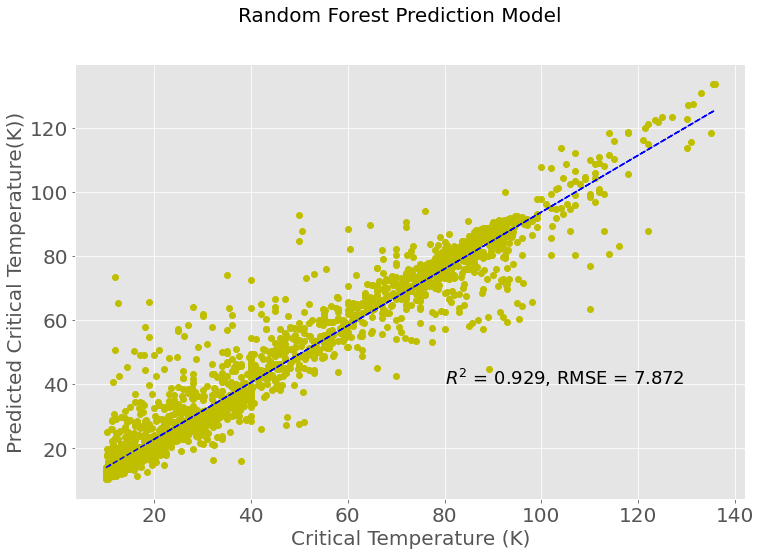

In [14]:
pred_y_rf = rf.predict(x)
f,ax=plt.subplots(figsize=(12, 8))
plt.plot(y, pred_y_rf, 'yo')
plt.annotate(r"$R^2$ = %.3f, RMSE = %.3f" % (round(rf.score(x,y),3), np.sqrt(mean_squared_error(y_true=y,y_pred=rf.predict(x)))), (80, 40), fontsize=18)
plt.xlabel("Critical Temperature (K)", fontsize = 20)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 20)
plt.suptitle('Random Forest Prediction Model', fontsize=20)
z = np.polyfit(y,pred_y_rf ,1)
p=np.poly1d(z)
pylab.plot(y,p(y),'b--')
plt.show()

In [15]:
rf_test = RandomForestRegressor(n_estimators=50, random_state=1)
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.10, random_state=42)
rf_test.fit(x_train, y_train)
print('training R2 = ' + str(round(rf_test.score(x_train, y_train), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y_train, y_pred=rf_test.predict(x_train))))
print('test R2 = ' + str(round(rf_test.score(x_test, y_test), 3)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y_test, y_pred=rf_test.predict(x_test))))

training R2 = 0.972
training RMSE = 4.911
test R2 = 0.836
test RMSE = 12.391


Linear Regression

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(train_x, train_y)
print('Training R2=' + str(round(lr.score(x,y),3)))
print('Training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y,y_pred=lr.predict(x))))

Training R2=0.661
Training RMSE = 17.260


In [18]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
r2_scores = cross_val_score(lr, x, y, scoring='r2', cv=crossvalidation, n_jobs=1)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 9769856530079.803
Folds: 10, mean RMSE: 29486527.217


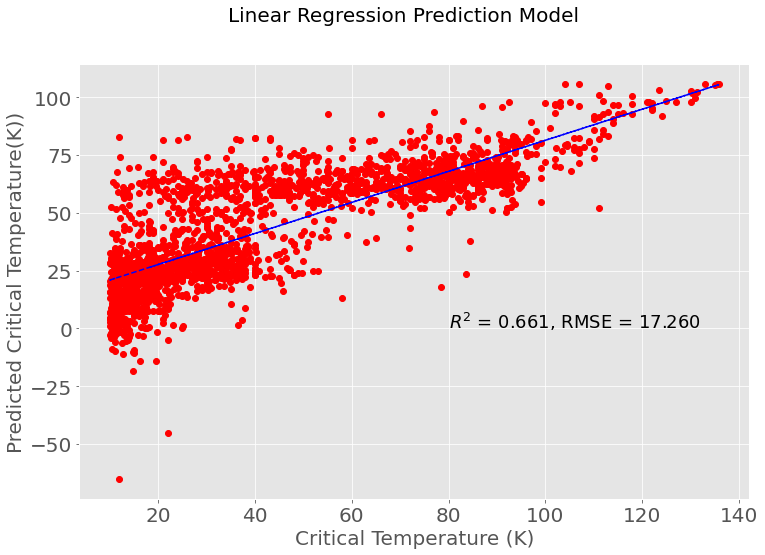

In [19]:
pred_y_lr = lr.predict(x)
pred_y_lr=pred_y_lr.tolist()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse=mean_squared_error(pred_y_lr,y,squared=False)
mlr = linear_model.LinearRegression()
yhat_mlr = cross_val_predict(mlr, x, y, cv=kfold)
r2_mlr = r2_score(y, yhat_mlr)
mse_mlr = mean_squared_error(y, yhat_mlr)
label_mlr = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2_mlr, mse_mlr)
f,ax=plt.subplots(figsize=(12, 8))
plt.plot(y, pred_y_lr, 'ro')
plt.suptitle('Linear Regression Prediction Model', fontsize=20)
plt.xlabel("Critical Temperature (K)", fontsize = 20)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 20)
plt.annotate(r"$R^2$ = %.3f, RMSE = %.3f" % (round(lr.score(x,y),3), np.sqrt(mean_squared_error(y_true=y,y_pred=lr.predict(x)))), (80, 0), fontsize=18)

from matplotlib import pylab
z = np.polyfit(y,pred_y_lr ,1)
p=np.poly1d(z)
pylab.plot(y,p(y),'b--')
plt.show()

# Ridge Regression Model

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1)
ridge=ridge.fit(x,y)

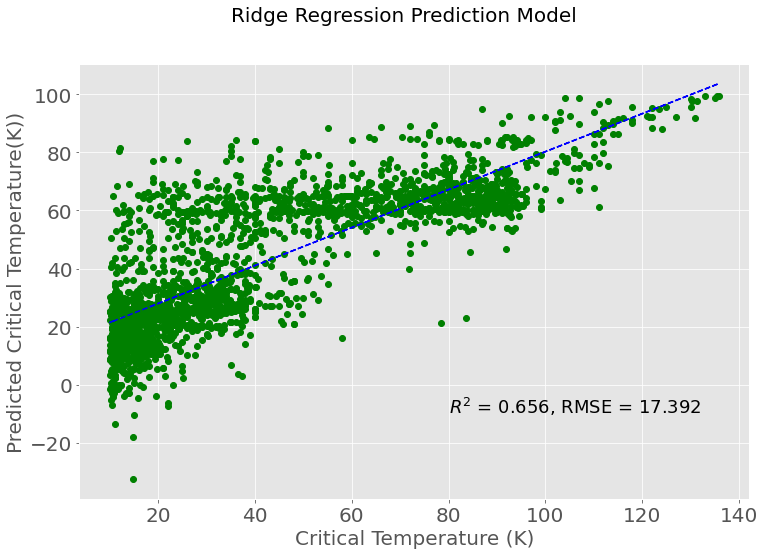

In [21]:
pred_y_ridge = ridge.predict(x)
mse=mean_squared_error(pred_y_ridge,y,squared=False)
f,ax=plt.subplots(figsize=(12, 8))
plt.plot(y, pred_y_ridge, 'go')
plt.suptitle('Ridge Regression Prediction Model', fontsize=20)
plt.xlabel("Critical Temperature (K)", fontsize = 20)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 20)
plt.annotate(r"$R^2$ = %.3f, RMSE = %.3f" % (round(ridge.score(x,y),3), np.sqrt(mean_squared_error(y_true=y,y_pred=ridge.predict(x)))), (80, -10), fontsize=18)

z = np.polyfit(y,pred_y_ridge ,1)
p=np.poly1d(z)
pylab.plot(y,p(y),'b--')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
means_ = scaler.mean_
stds_ = scaler.scale_
z = scaler.transform(x)

In [23]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
r2_scores = cross_val_score(ridge, x, y, scoring='r2', cv=crossvalidation, n_jobs=1)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.562
Folds: 10, mean RMSE: 19.368


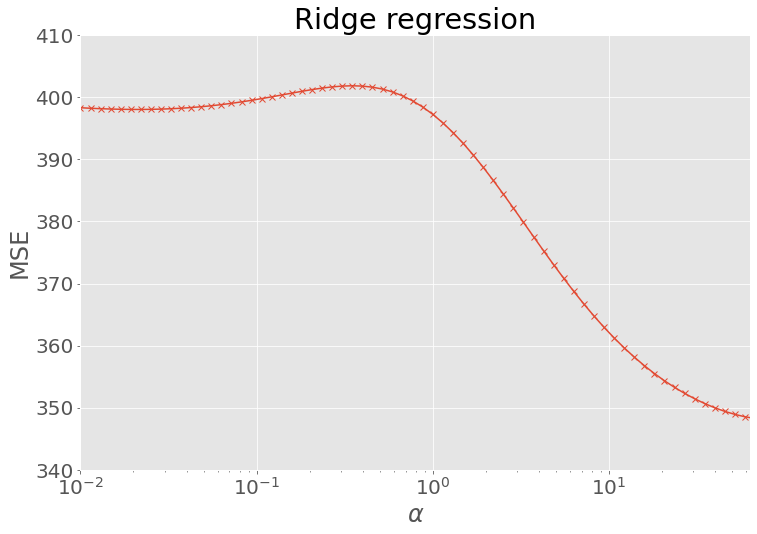

In [24]:
cv_results = []
coeffs = []
alphas = np.logspace(-2, 2, 71)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(z, y)
    scores = cross_validate(ridge, z, y, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(ridge.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
f, ax = plt.subplots(figsize=(12, 8))
plt.plot(cv_results["alpha"], cv_results["score"], '-x')
plt.xlim([1e-2, 10**1.8])
plt.ylim((340, 410))
plt.xscale(r'log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'MSE')
plt.title(r'Ridge regression')
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(r"Best $\alpha$ = %.3f" % best_alpha, (best_alpha, cv_results["score"].min()), fontsize=16);

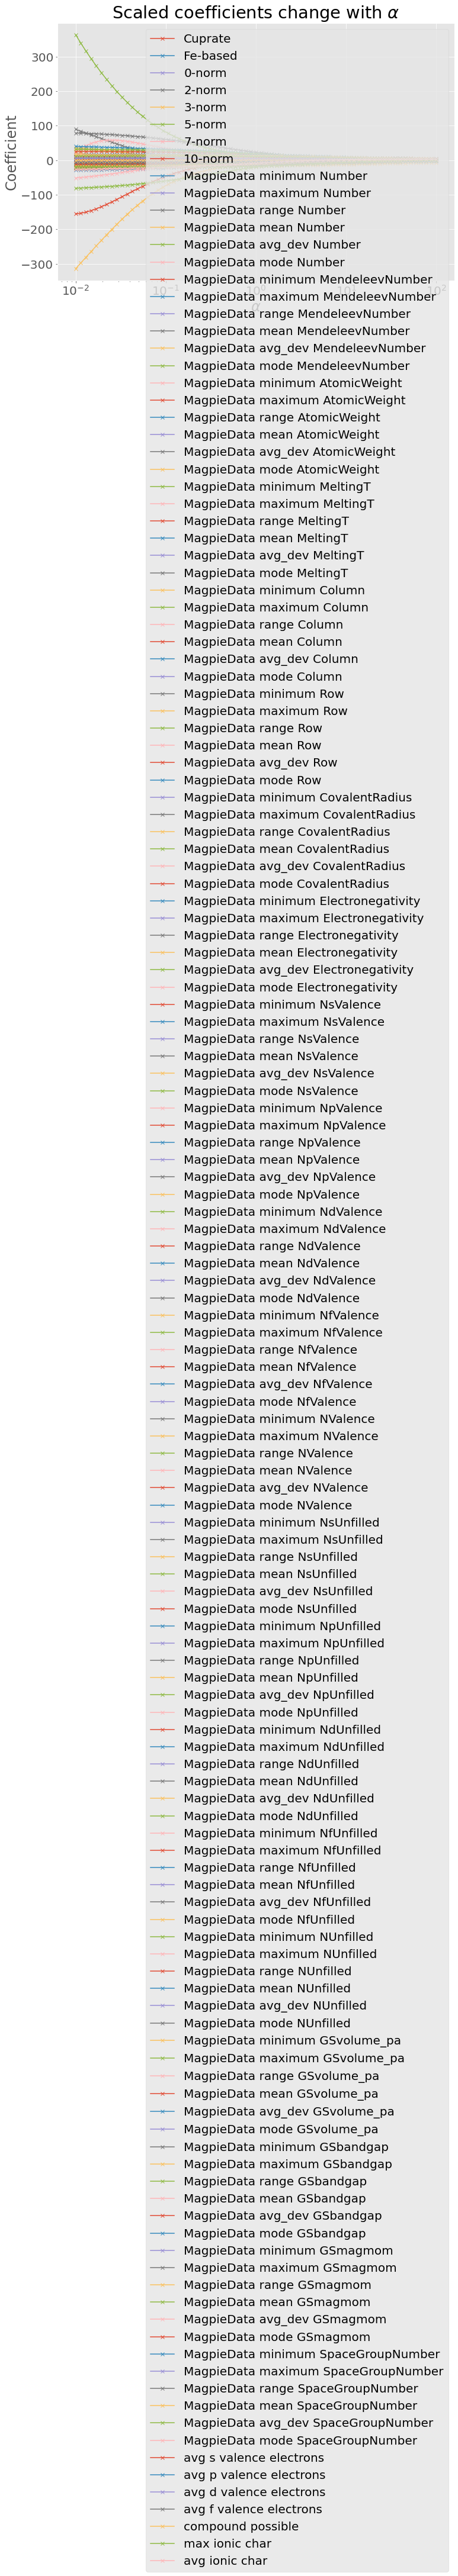

In [25]:
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], '-x', label=f)
    plt.xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Coefficient')
    plt.title(r'Scaled coefficients change with $\alpha$')
plt.legend()

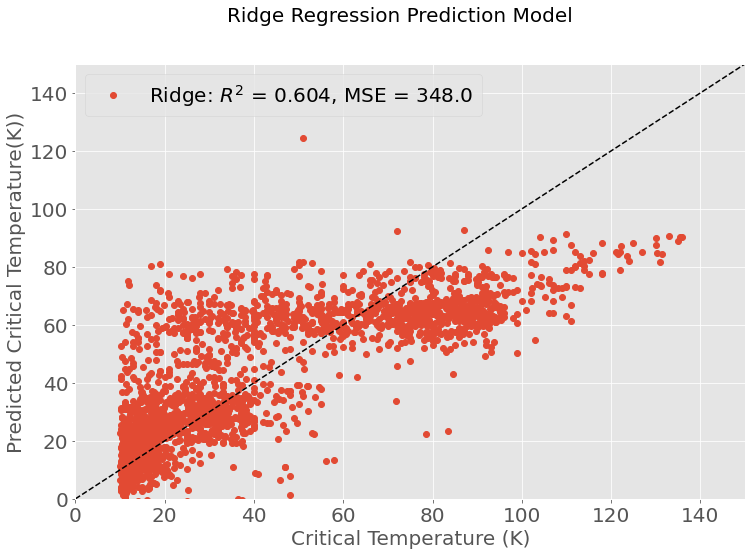

In [26]:
reg = linear_model.Ridge(alpha=best_alpha, max_iter=10000)
reg.fit(z, y)

real_coef = reg.coef_  / stds_   # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs

equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features)]
ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000)
yhat_ridge = cross_val_predict(ridge, z, y, cv=kfold)
r2_ridge = r2_score(y, yhat_ridge)
mse_ridge = mean_squared_error(y, yhat_ridge)
label_ridge = "Ridge: $R^2$ = %.3f, MSE = %.1f" % (r2_ridge, mse_ridge)

f, ax = plt.subplots(figsize=(12, 8))
plt.suptitle('Ridge Regression Prediction Model', fontsize=20)
plt.plot(y, yhat_ridge, 'o', label=label_ridge)
plt.xlabel("Critical Temperature (K)", fontsize = 20)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 20)
plt.legend()
plt.xlim([0, 150])
plt.ylim([0, 150])
plt.plot([0, 150], [0, 150], 'k--');

Lasso

In [27]:
scaler = StandardScaler()
scaler.fit(x)
means_ = scaler.mean_
stds_ = scaler.scale_
z = scaler.transform(x)

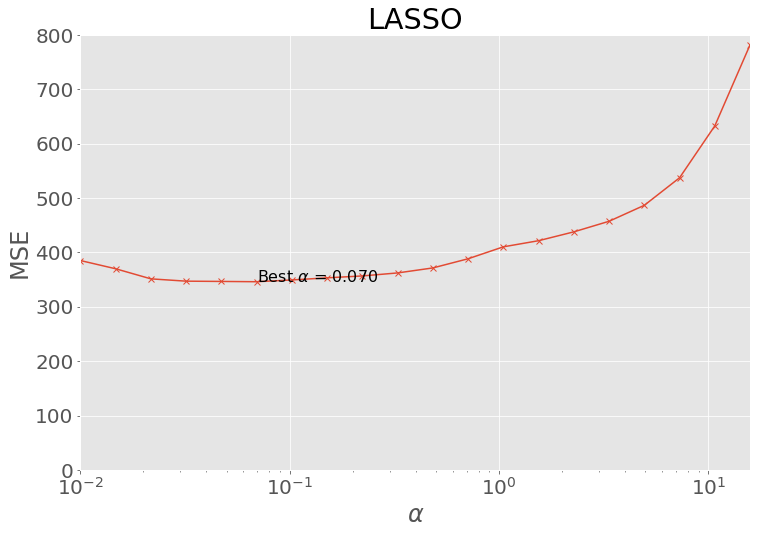

In [28]:
alphas = np.logspace(-2, 1.2, 20)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z, y)
    scores = cross_validate(lasso, z, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
f, ax = plt.subplots(figsize=(12, 8))
plt.plot(cv_results["alpha"], cv_results["score"], '-x')
plt.xlim([1e-2, 10**1.2])
plt.ylim((0, 800))
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.title('LASSO')
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(r"Best $\alpha$ = %.3f" % best_alpha, (best_alpha, cv_results["score"].min()), fontsize=16);



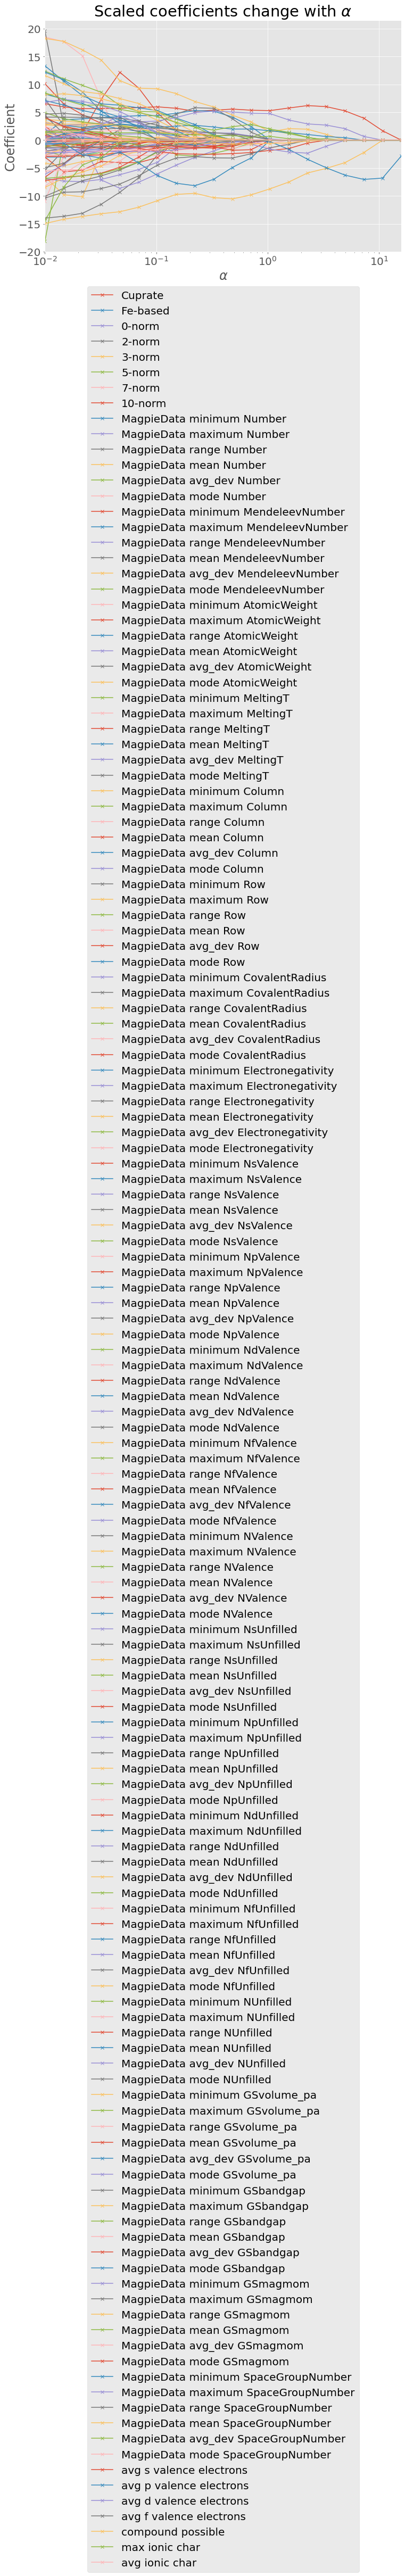

In [29]:
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], '-x', label=f)
    plt.xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Coefficient')
    plt.title(r'Scaled coefficients change with $\alpha$')
plt.legend(loc= "lower center", bbox_to_anchor=(0.5,-10.05))
plt.xlim([1e-2, 10**1.2]);

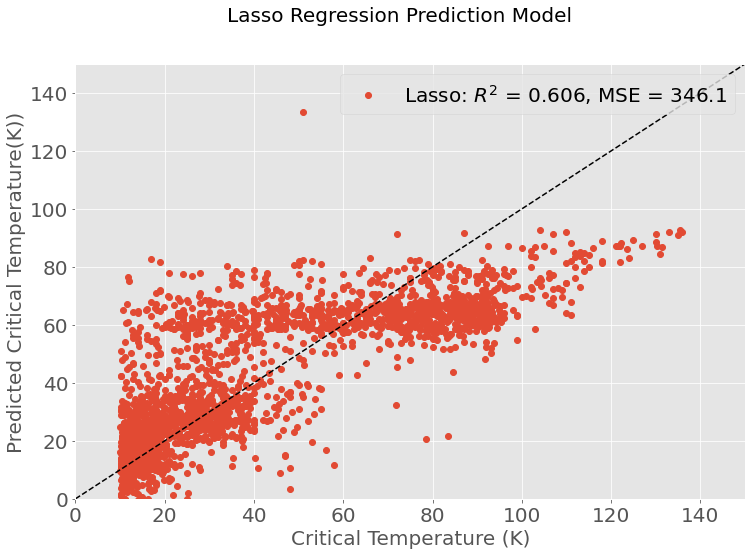

In [30]:
reg = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
reg.fit(z, y)

real_coef = reg.coef_  / stds_   # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs

equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]


lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
yhat_lasso = cross_val_predict(lasso, z, y, cv=kfold)
r2_lasso = r2_score(y, yhat_lasso)
mse_lasso = mean_squared_error(y, yhat_lasso)
label_lasso = "Lasso: $R^2$ = %.3f, MSE = %.1f" % (r2_lasso, mse_lasso)

f, ax = plt.subplots(figsize=(12, 8))
plt.suptitle('Lasso Regression Prediction Model', fontsize=20)
plt.plot(y, yhat_lasso, 'o', label=label_lasso)
plt.xlabel("Critical Temperature (K)", fontsize = 20)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 20)
plt.legend()
plt.xlim([0, 150])
plt.ylim([0, 150])
plt.plot([0, 150], [0, 150], 'k--');

KNeighborsRegressor

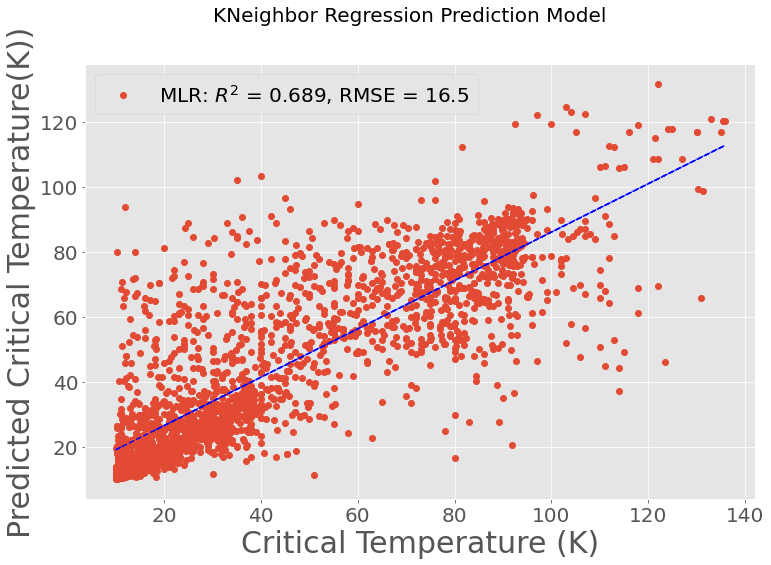

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
yhat_knn = cross_val_predict(knn, x, y, cv=kfold)
r2_knn = r2_score(y, yhat_knn)
mse_knn = mean_squared_error(y, yhat_knn)
label_knn = "MLR: $R^2$ = %.3f, RMSE = %.1f" % (r2_knn, np.sqrt(mse_knn))
f, ax = plt.subplots(figsize=(12, 8))
plt.plot(y, yhat_knn, 'o', label=label_knn)
plt.suptitle('KNeighbor Regression Prediction Model', fontsize=20)
plt.xlabel("Critical Temperature (K)", fontsize = 30)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 30)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.legend()

z = np.polyfit(y,yhat_knn ,1)
p=np.poly1d(z)
pylab.plot(y,p(y),'b--')
plt.show()

Partial Least Square

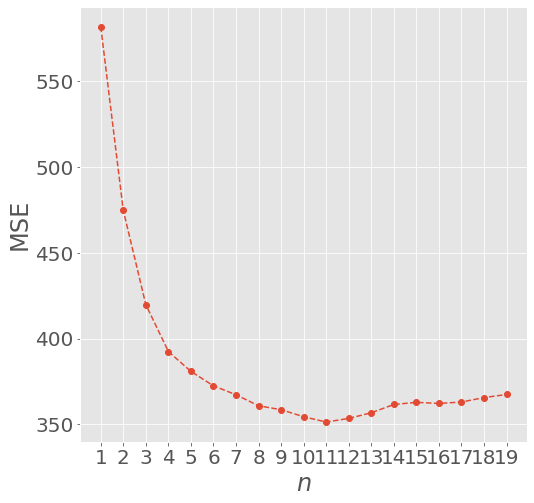

In [32]:
from sklearn.cross_decomposition import PLSRegression
mses = []
for n in range(1, 20):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    pls = PLSRegression(n_components=n)
    yhat_pls = cross_val_predict(pls, x, y, cv=kfold)
    r2_knn = r2_score(y, yhat_pls)
    mses.append((n, mean_squared_error(y, yhat_pls)))

mses = pd.DataFrame(mses, columns=["n", "MSE"])
    
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(mses["n"], mses["MSE"], 'o--')
plt.xticks(range(1, 20))
plt.ylabel(r"MSE")
plt.xlabel(r"$n$");

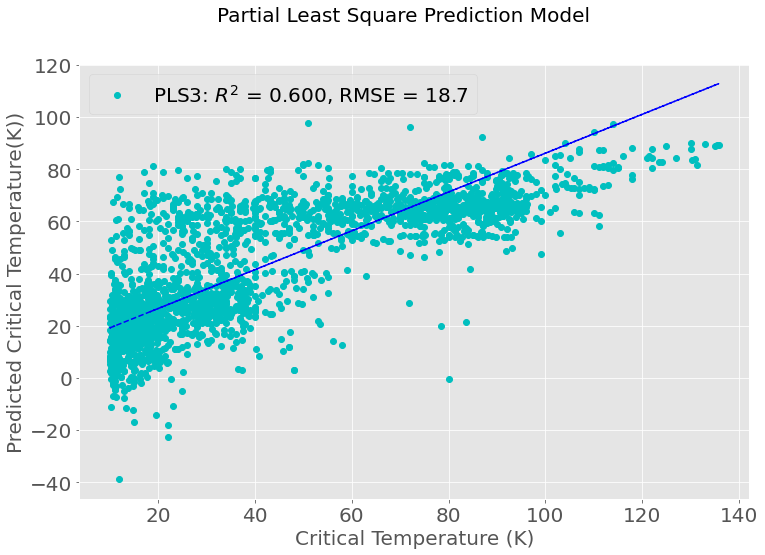

In [33]:
cv_results = []
coeffs = []
pls = PLSRegression(n_components=11)
pls.fit(x, y)
yhat_pls = cross_val_predict(pls, x, y, cv=kfold)
r2_pls = r2_score(y, yhat_pls)
mse_pls = mean_squared_error(y, yhat_pls)
label_pls = "PLS3: $R^2$ = %.3f, RMSE = %.1f" % (r2_pls, np.sqrt(mse_pls))

f, ax = plt.subplots(figsize=(12, 8))

plt.plot(y, yhat_pls, 'co', label=label_pls)
plt.suptitle('Partial Least Square Prediction Model', fontsize=20)
plt.xlabel("Critical Temperature (K)", fontsize = 20)
plt.ylabel("Predicted Critical Temperature(K))", fontsize = 20)
z = np.polyfit(y,yhat_knn ,1)
p=np.poly1d(z)
pylab.plot(y,p(y),'b--')
plt.legend()